# Titanic Data Analysis and Predictive Modeling

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [262]:
import warnings
warnings.filterwarnings('ignore')

In [263]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,male,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,Q,1
996,997,2,Edward Stanley,female,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,C,0
997,998,3,Christina Johnson,male,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,C,0
998,999,3,Edgar Miller,male,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,S,1


In [264]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64

In [265]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1.964000,38.458000,2.032000,2.005000,247.968650,0.492000
std,288.819436,0.820596,23.103723,1.424431,1.410306,139.301211,0.500186
min,1.000000,1.000000,1.000000,0.000000,0.000000,10.020000,0.000000
25%,250.750000,1.000000,19.000000,1.000000,1.000000,126.295000,0.000000
50%,500.500000,2.000000,36.500000,2.000000,2.000000,246.500000,0.000000
75%,750.250000,3.000000,59.000000,3.000000,3.000000,365.662500,1.000000
max,1000.000000,3.000000,79.000000,4.000000,4.000000,499.780000,1.000000


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


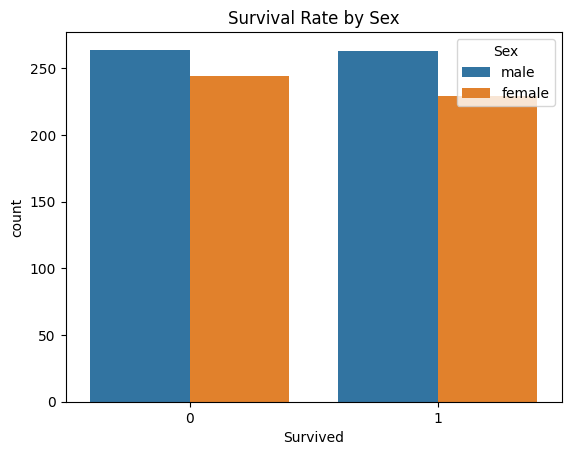

In [267]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Rate by Sex')
plt.show()

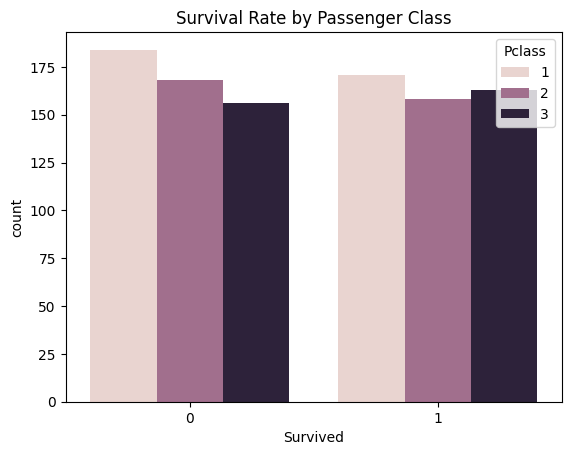

In [268]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

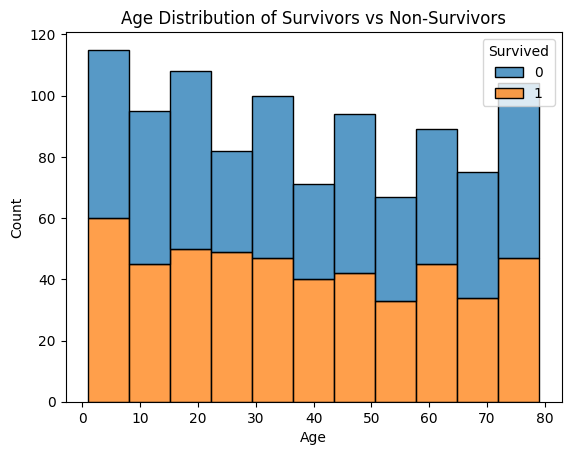

In [269]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Age Distribution of Survivors vs Non-Survivors')
plt.show()

In [270]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,0,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,0,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,0,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,0,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,1,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,0,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,Q,1
996,997,2,Edward Stanley,1,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,C,0
997,998,3,Christina Johnson,0,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,C,0
998,999,3,Edgar Miller,0,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,S,1


In [271]:
from sklearn.preprocessing import LabelEncoder
label_encoder_embarked = LabelEncoder()
df['Embarked'] = label_encoder_embarked.fit_transform(df['Embarked'])
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,0,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,1,1
1,2,1,Noah Rhodes,0,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,2,0
2,3,3,Angie Henderson,0,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,1,1
3,4,3,Daniel Wagner,0,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,0,1
4,5,1,Cristian Santos,1,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,0,1
...,...,...,...,...,...,...,...,...,...,...,...
995,996,2,Brittany Ward,0,69,2,3,75eb0e8f-a090-460d-a7c7-655a7b434a72,19.87,1,1
996,997,2,Edward Stanley,1,61,4,4,e55b93ad-8976-4471-9d7f-57d1e45def26,85.35,0,0
997,998,3,Christina Johnson,0,10,4,1,d06d3943-c8b3-415e-b664-704355c9bf0f,444.22,0,0
998,999,3,Edgar Miller,0,50,3,2,0e5779ec-be1a-470f-ad83-a4c869f8d3e4,234.67,2,1


In [272]:
X = df.drop(['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,17,4,2,144.08,1
1,1,0,60,2,2,249.04,2
2,3,0,64,0,0,50.31,1
3,3,0,35,4,0,235.20,0
4,1,1,70,0,3,160.17,0
...,...,...,...,...,...,...,...
995,2,0,69,2,3,19.87,1
996,2,1,61,4,4,85.35,0
997,3,0,10,4,1,444.22,0
998,3,0,50,3,2,234.67,2


In [273]:
y = df['Survived']
y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    0
997    0
998    1
999    1
Name: Survived, Length: 1000, dtype: int64

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
lr = LogisticRegression()
lr

LogisticRegression()

## Without Pre-Processing

In [277]:
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.56
[[61 45]
 [43 51]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.58       106
           1       0.53      0.54      0.54        94

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.56      0.56      0.56       200



## Pre-Processing

In [278]:
from sklearn.preprocessing import StandardScaler

In [279]:
ss = StandardScaler()
ss

StandardScaler()

In [280]:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [281]:
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)

pred = lr1.predict(X_test)

accuracy = accuracy_score(y_test, pred)
conf_matrix = confusion_matrix(y_test, pred)
class_report = classification_report(y_test, pred)

print(accuracy)
print(conf_matrix)
print(class_report)

0.565
[[62 44]
 [43 51]]
              precision    recall  f1-score   support

           0       0.59      0.58      0.59       106
           1       0.54      0.54      0.54        94

    accuracy                           0.56       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.57      0.56      0.57       200



# Hyperparameter Tuning

In [282]:
from sklearn.model_selection import GridSearchCV

In [283]:
par={
    'penalty': ['l2'],
    'dual': [False],
    'tol': [0.0001, 0.00001, 0.001],
    'C': [0.01, 0.1, 1, 10],
    'fit_intercept': [True, False],
    'intercept_scaling': [1, 0.5, 2],
    'class_weight': [None, 'balanced'],
    'solver': ['lbfgs'],
    'max_iter': [100, 200, 300],
    'multi_class': ['auto'],
    'warm_start': [False, True],
 }
class_regressor= GridSearchCV(lr,param_grid=par,scoring='accuracy',cv=5, n_jobs=-1)
class_regressor

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'], 'dual': [False],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [1, 0.5, 2],
                         'max_iter': [100, 200, 300], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'solver': ['lbfgs'],
                         'tol': [0.0001, 1e-05, 0.001],
                         'warm_start': [False, True]},
             scoring='accuracy')

In [284]:
class_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'], 'dual': [False],
                         'fit_intercept': [True, False],
                         'intercept_scaling': [1, 0.5, 2],
                         'max_iter': [100, 200, 300], 'multi_class': ['auto'],
                         'penalty': ['l2'], 'solver': ['lbfgs'],
                         'tol': [0.0001, 1e-05, 0.001],
                         'warm_start': [False, True]},
             scoring='accuracy')

In [285]:
class_regressor.best_params_

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'lbfgs',
 'tol': 0.001,
 'warm_start': False}

In [286]:
class_regressor.best_score_

0.48999999999999994

In [287]:
class_regressor.score(X_test,y_test)

0.565

In [288]:
pred = class_regressor.predict(X_test)
pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1], dtype=int64)

In [289]:
acc=accuracy_score(y_test,pred)
acc

0.565